# Primer clustering con scikit-learn

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías y carga de datos de prueba

In [178]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [179]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)


n_samples=100: Este argumento indica cuántos puntos de datos o muestras queremos generar. En este caso, estamos generando 100 puntos de datos simulados.

centers=4: Aquí especificamos el número de "centros" o grupos de datos que queremos crear. Cada centro es un grupo de puntos de datos similares. En este caso, estamos creando 4 grupos de datos distintos.

n_features=2: Este argumento define cuántas características o dimensiones tendrá cada punto de datos. En otras palabras, estamos generando puntos de datos que tienen 2 propiedades o valores.

cluster_std=[1,1.5,2,2]: Indica la dispersión o la extensión de los puntos dentro de cada grupo o centro. Cada número en la lista corresponde a un centro. Por ejemplo, el primer centro (centro 0) tiene una dispersión de 1, el segundo centro (centro 1) tiene una dispersión de 1.5, el tercer centro (centro 2) tiene una dispersión de 2, y el cuarto centro (centro 3) también tiene una dispersión de 2.

random_state=7: Este es un valor que se utiliza para inicializar la generación de números aleatorios. Al fijar este valor, aseguramos que los datos generados sean consistentes cada vez que ejecutemos el código con el mismo valor. Es útil para fines de reproducibilidad.

In [180]:
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2':x[:,1], 
    'y':y

})

In [181]:
df_blobls # esto se va a usar para comprobar los datos

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [182]:
def plot_2d_clusters(x, y, ax):
    y_uniques = pd.Series(y).unique()  # valores unicos de y 

    for cluster in y_uniques:
        cluster_data = x[y == cluster]
        ax.scatter(cluster_data['x1'], cluster_data['x2'], label=f'Cluster {cluster}', marker=f'${cluster}$')

    ax.set_title(f'{len(y_uniques)} Clusters')
    ax.legend()


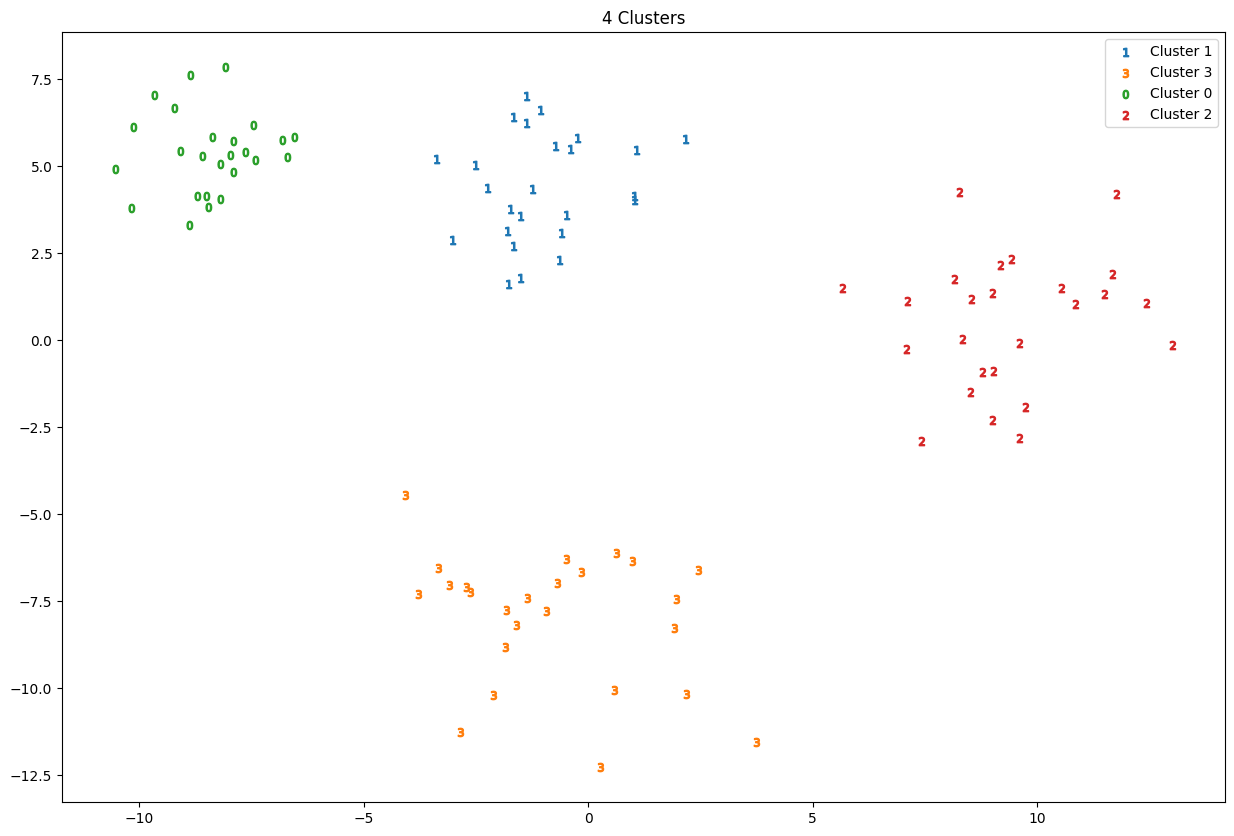

In [183]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)

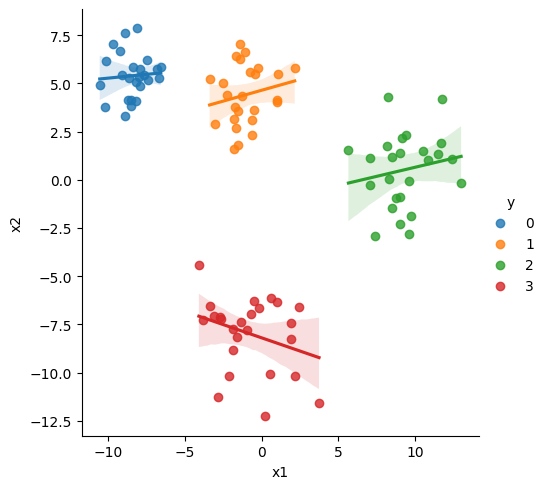

In [184]:
sns.lmplot(x='x1',y='x2',hue='y',data=df_blobls) # de esta manera es mas facil graficar con scatterplot o lmplot

## Aplicando clustering

In [185]:
from sklearn.cluster import KMeans

In [186]:
kmeans = KMeans(n_clusters=4, random_state=7)
# n_clusters=4 establece el numero de clusters que quieres 

In [187]:
y_pred = kmeans.fit_predict(x)# prediccion de la variable x 

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f124abfe5f0>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
 

In [188]:
y_pred # esto es una prediccion de como deberian de ser los cluster sin nunca haber visto antes y 

array([2, 3, 1, 2, 1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 2, 3, 3, 0, 3, 1, 2, 1,
       1, 3, 0, 1, 0, 0, 3, 2, 3, 3, 2, 3, 3, 1, 0, 1, 2, 1, 3, 2, 2, 0,
       2, 0, 1, 1, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 2, 2, 2, 1, 3, 0, 3, 0, 1,
       1, 2, 3, 2, 1, 3, 0, 0, 3, 2, 1, 2], dtype=int32)

Text(0.5, 1.0, 'Kmeans 4 Clusters')

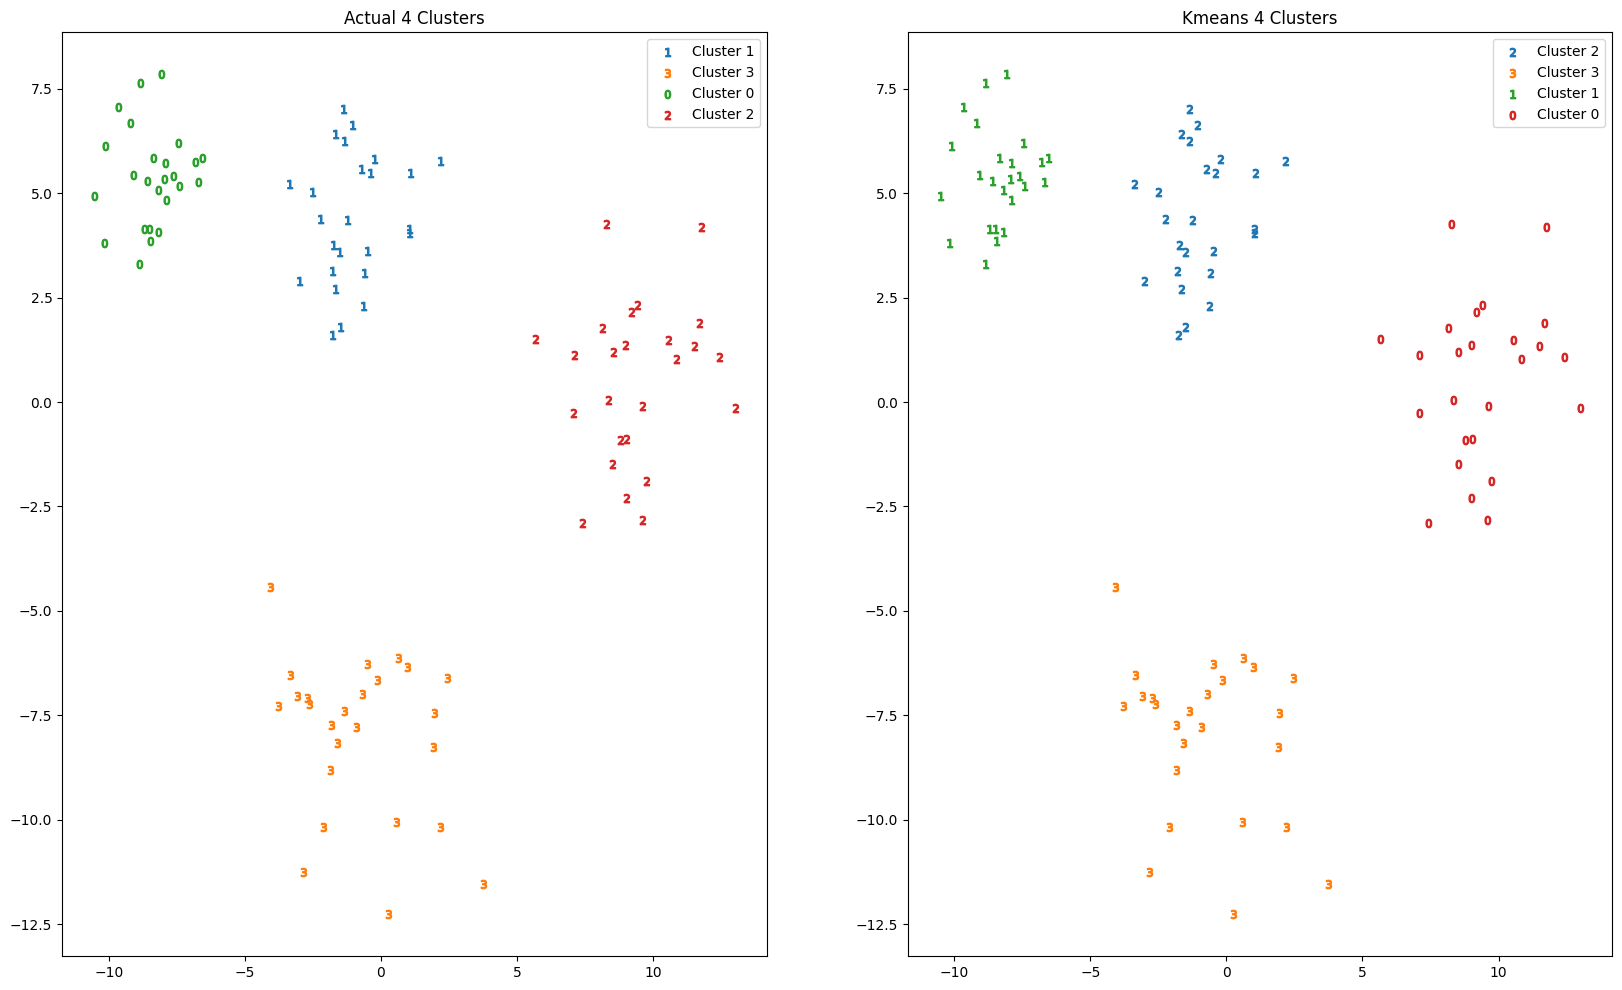

In [189]:
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')



# Uso del Clustering en Análisis de Datos

El clustering es una técnica de aprendizaje no supervisado que se utiliza para encontrar patrones y estructuras en los datos. Se puede utilizar en diversas situaciones y contextos donde se desea identificar grupos o categorías naturales en los datos sin tener una variable objetivo predefinida.

## Casos de Uso del Clustering

1. **Mayor contexto de mi dataset:** El clustering puede ayudar a descubrir patrones y estructuras en los datos que no son evidentes a simple vista. Esto puede proporcionar una mejor comprensión del conjunto de datos y puede ayudar a identificar relaciones y tendencias entre las variables.

2. **Detección de outliers:** El clustering también puede utilizarse para detectar outliers o valores atípicos en los datos que no siguen el patrón de los demás valores. Esto puede ser útil para identificar problemas o errores en los datos o para identificar posibles anomalías o excepciones en los datos.

3. **Clasificar/Agrupar (sin variable objetivo):** El clustering se utiliza comúnmente para clasificar y agrupar datos en categorías o grupos basados en características similares. Esto puede ser útil para identificar patrones en los datos y para simplificar la visualización y el análisis de grandes conjuntos de datos.

4. **Tareas manuales de crear etiquetas:** En algunos casos, es posible que no haya una variable objetivo clara o definida en los datos. En este caso, el clustering puede ser utilizado para agrupar los datos en categorías o grupos que pueden ser etiquetados manualmente para su posterior análisis.

## Ejemplos de lo que se puede lograr con el Clustering

1. **Clasificar el tráfico en una página:** El clustering puede utilizarse para identificar patrones en el tráfico de una página web y clasificar a los visitantes en diferentes categorías, como nuevos visitantes, visitantes frecuentes, visitantes que compran con frecuencia, etc.

2. **Segmentación de perfiles de clientes:** El clustering puede ayudar a identificar patrones en los datos de los clientes y segmentarlos en diferentes grupos basados en características similares, como edad, género, ubicación, historial de compras, etc.

3. **Clasificación de contenido:** El clustering puede utilizarse para clasificar contenido en diferentes categorías, como noticias, entretenimiento, deportes, etc.

4. **Identificar comportamientos fraudulentos:** El clustering puede ser utilizado para identificar patrones en los datos que pueden indicar comportamientos fraudulentos o sospechosos, como transacciones inusuales o actividades sospechosas.

5. **Ciencia en los deportes:** El clustering puede ser utilizado en el análisis de datos en la ciencia en los deportes para identificar patrones en los datos relacionados con el rendimiento de los atletas, la eficacia de las tácticas de juego, etc.

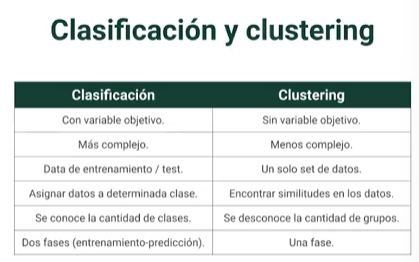

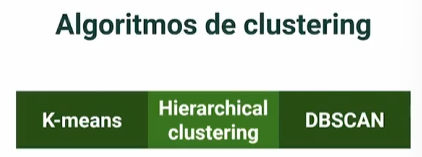

## Conclusión

El clustering es una herramienta poderosa para explorar y comprender datos en una variedad de situaciones, y puede ser útil tanto en el mundo de los negocios como en la investigación científica y médica.


# Evaluacion del modelo 

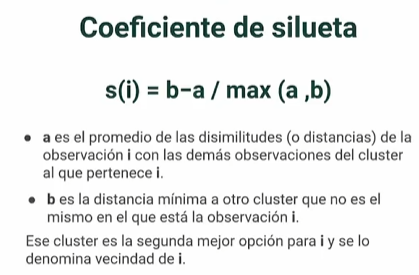

Generalmente, se prefiere que el valor del Silhouette Score sea más cercano a 1, lo que indica una mejor separación entre los clusters. Un valor cercano a 0 significa que los clusters se superponen significativamente, mientras que un valor negativo indica que los puntos podrían haber sido asignados incorrectamente a los clusters.

 se saca el promedio de todos los puntos del cluster de la silueta que es de 0.6 esto significa que esta mas cerca al 1 y por lo tanto es una clasificacion aceptable 

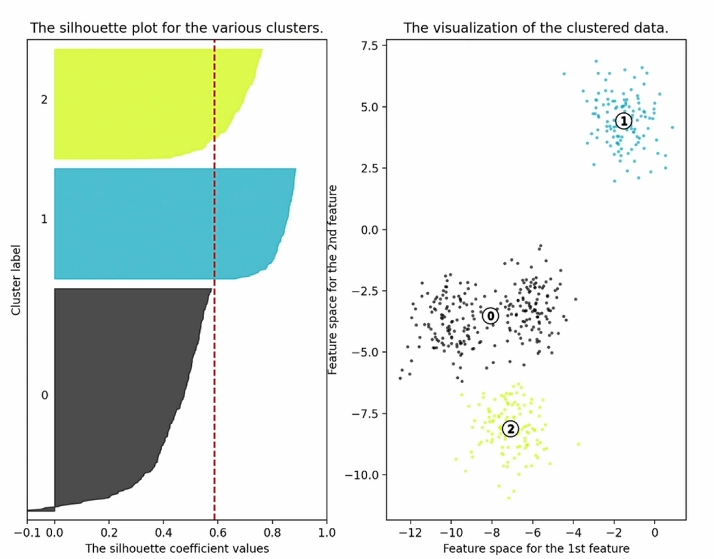

para calcular el indice de silueta, se escoge un data point, se suma la distancia de los otros data points de su mismo cluster y se promedia esto es igual a ="a", luego se mide la ditancia con los otros datapoint de diferentes clusters con base a su pormedio y se escoje el mas cercano en el ejemplo es el rojo con un valor de 7 y esto es igual a = "b", luego se resta b - a /entre el valor max entre b y a que en este caso el valor max entre a =4 y b =7 es 7, luego da el indice de silueta para el datapoint que se escogio y susesivamente se hace con todos, luego se promedian los valores para cada cluster y un promedio grobal 

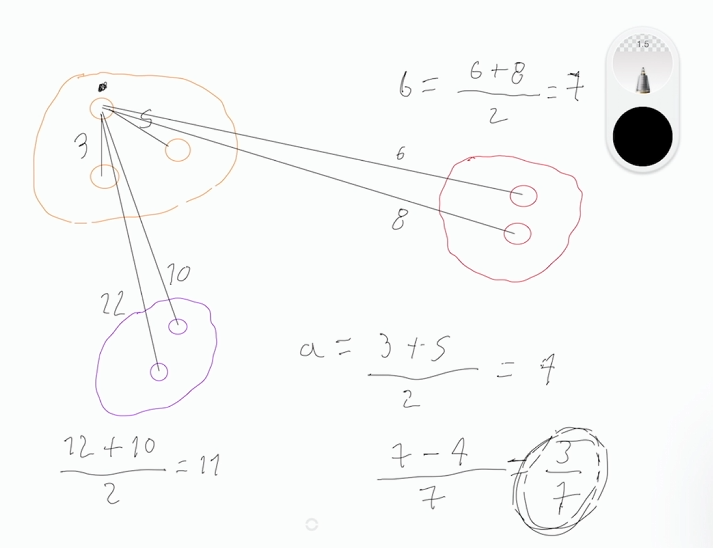